# COUNT PLOT — COMPLETE NOTEBOOK CODE (All Variants)

## START THE NOTEBOOK

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset("tips")     
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Count Plot

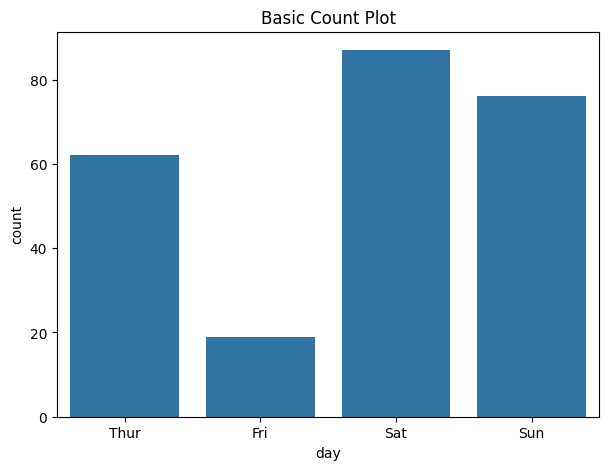

In [3]:
plt.figure(figsize=(7,5))
sns.countplot(data=tips, x="day")
plt.title("Basic Count Plot")
plt.show()


## Horizontal Count Plot

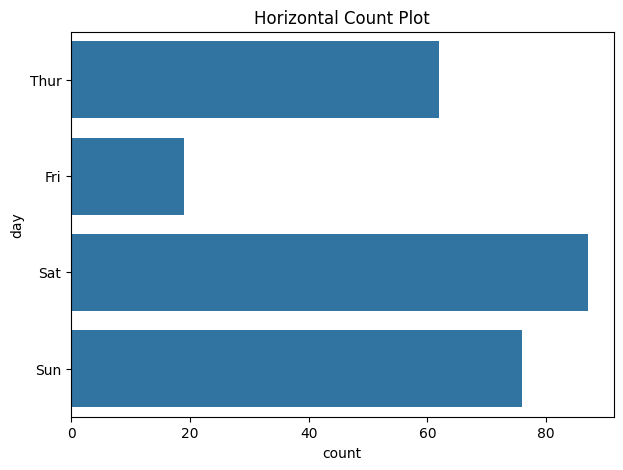

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(data=tips, y="day")
plt.title("Horizontal Count Plot")
plt.show()


## Count Plot with Hue (Grouped)

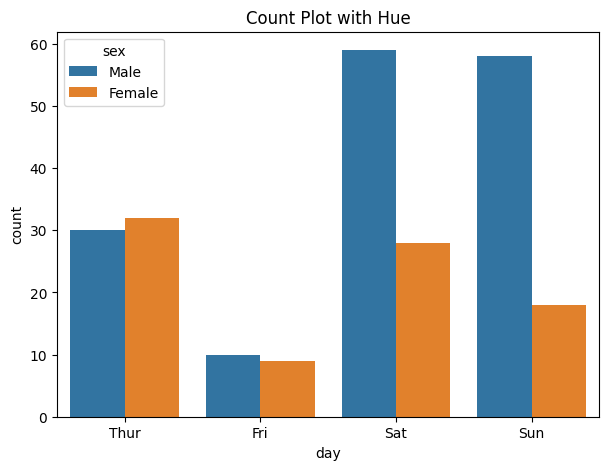

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(data=tips, x="day", hue="sex")
plt.title("Count Plot with Hue")
plt.show()


## Grouped Count Plot — Normalized Percentages

/tmp/ipykernel_3763524/1288426225.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["day","sex"])
/tmp/ipykernel_3763524/1288426225.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0, group_keys=False)


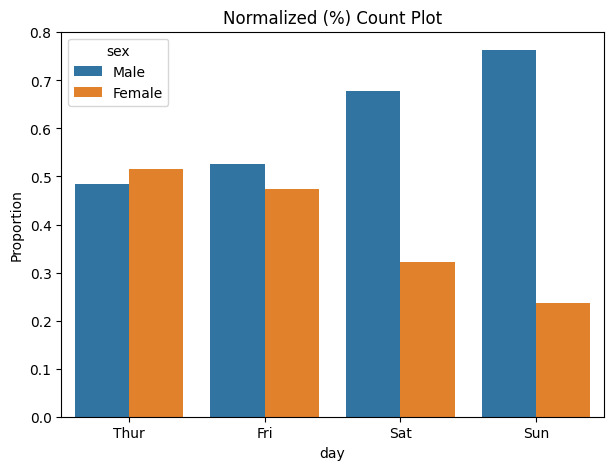

In [8]:
norm = (
    tips.groupby(["day","sex"])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .reset_index(name="percent")
)

plt.figure(figsize=(7,5))
sns.barplot(data=norm, x="day", y="percent", hue="sex")
plt.title("Normalized (%) Count Plot")
plt.ylabel("Proportion")
plt.show()


## Count Plot with Custom Colors

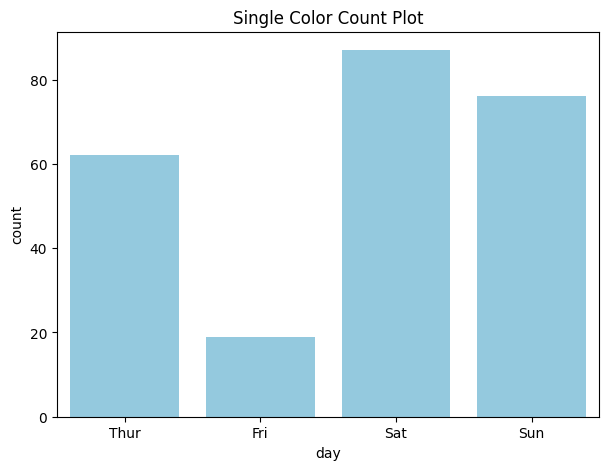

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(data=tips, x="day", color="skyblue")
plt.title("Single Color Count Plot")
plt.show()


## Hue Count Plot with Color Palette

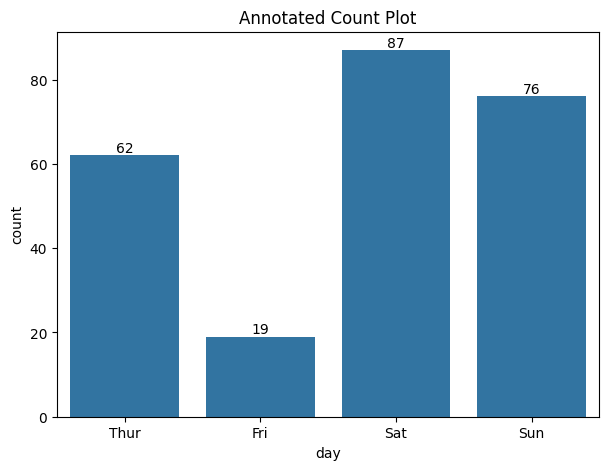

In [10]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=tips, x="day")

for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")

plt.title("Annotated Count Plot")
plt.show()


##  Count Plot with Ordering by Frequency

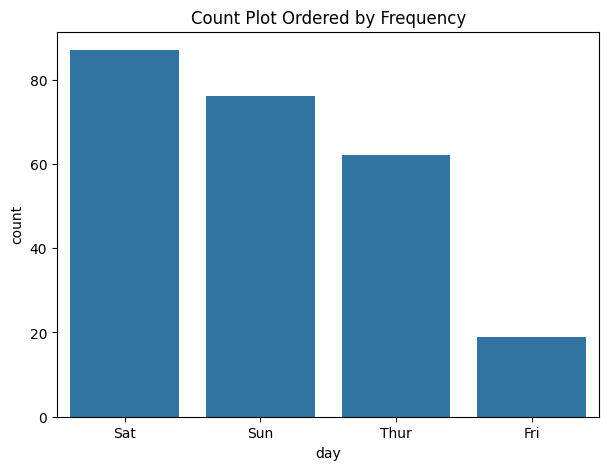

In [11]:
order = tips["day"].value_counts().index

plt.figure(figsize=(7,5))
sns.countplot(data=tips, x="day", order=order)
plt.title("Count Plot Ordered by Frequency")
plt.show()


## Top-N Count Plot (e.g., Top 3 categories)

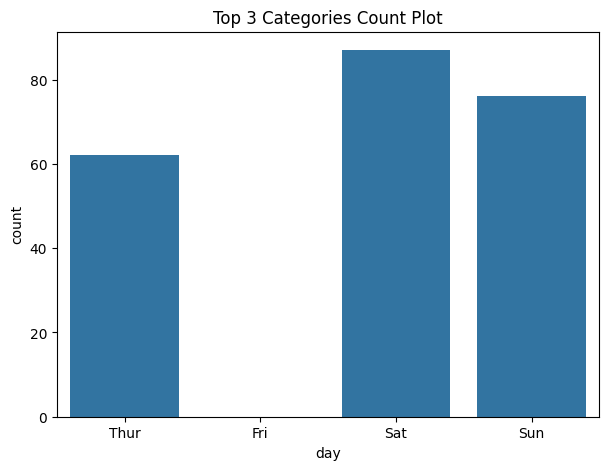

In [12]:
N = 3
topN = tips["day"].value_counts().nlargest(N).index

plt.figure(figsize=(7,5))
sns.countplot(data=tips[tips.day.isin(topN)], x="day")
plt.title(f"Top {N} Categories Count Plot")
plt.show()


## Count Plot on FacetGrid (Multiple Subplots)

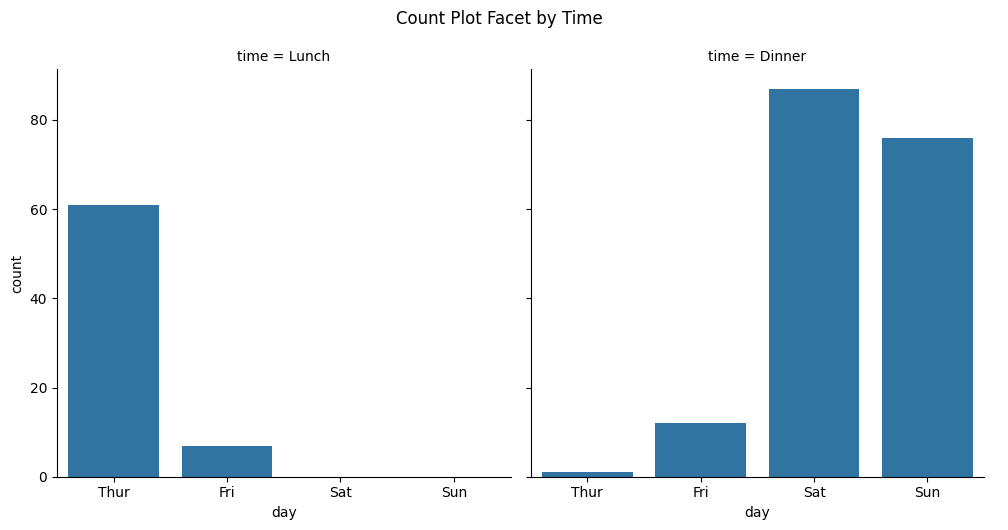

In [13]:
g = sns.catplot(data=tips, x="day", col="time", kind="count", height=5)
g.fig.suptitle("Count Plot Facet by Time", y=1.05)
plt.show()


## Count Plot for Multiple Categorical Columns Automatically

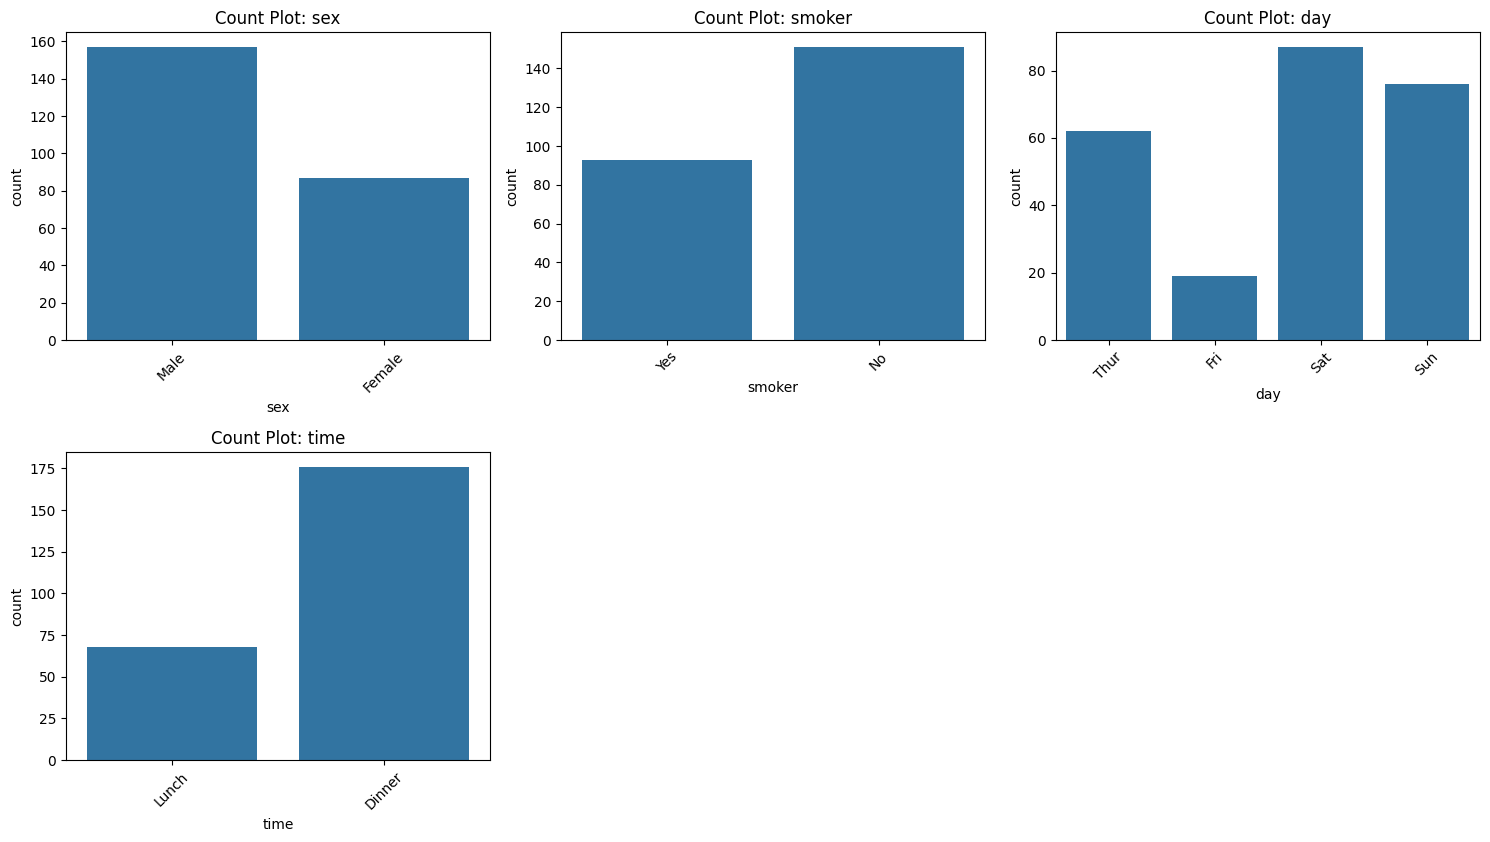

In [14]:
categorical_cols = tips.select_dtypes(include=["category","object"]).columns

plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=tips, x=col)
    plt.title(f"Count Plot: {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cross-tab Count Plot (Two-way Category Interaction)

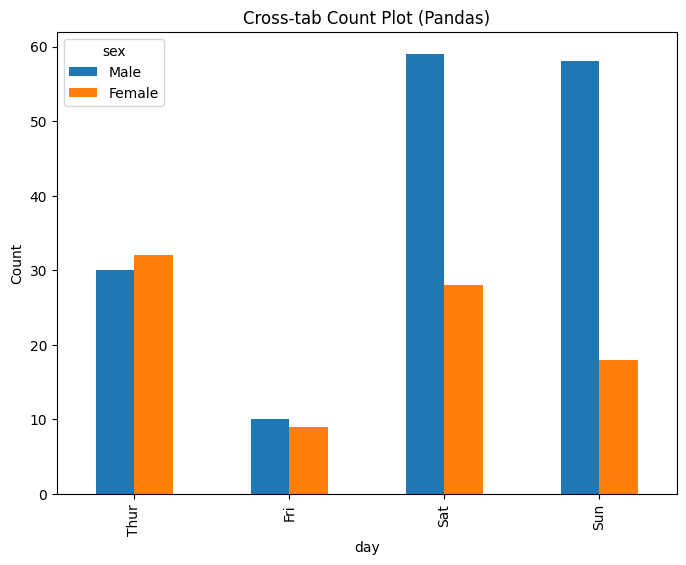

In [15]:
ct = pd.crosstab(tips["day"], tips["sex"])

ct.plot(kind="bar", figsize=(8,6))
plt.title("Cross-tab Count Plot (Pandas)")
plt.ylabel("Count")
plt.show()


## Count Plot from Aggregated Data

/tmp/ipykernel_3763524/1639900993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tips.groupby("day").size().reset_index(name="count")
/tmp/ipykernel_3763524/1639900993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x="day", y="count", palette="coolwarm")


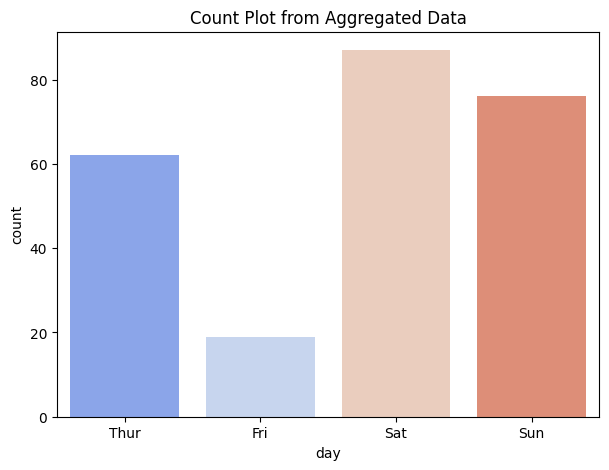

In [16]:
agg = tips.groupby("day").size().reset_index(name="count")

plt.figure(figsize=(7,5))
sns.barplot(data=agg, x="day", y="count", palette="coolwarm")
plt.title("Count Plot from Aggregated Data")
plt.show()


## Count Plot with Error Bars (Bootstrapped)

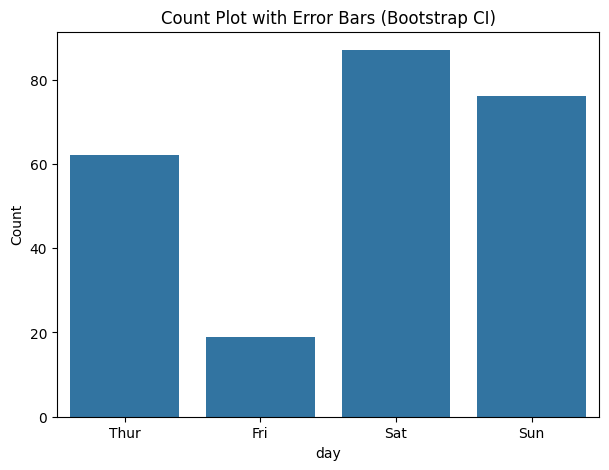

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(data=tips, x="day", y="size", estimator=len, errorbar="ci")
plt.title("Count Plot with Error Bars (Bootstrap CI)")
plt.ylabel("Count")
plt.show()


## Interactive Count Plot (Plotly)

In [19]:
! pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.8 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [ ]:
!pip install nbformat --upgrade


  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
Using cached jsonschema-4.25.1-py3-none-any.whl (90 kB)
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Using cached referencing-0.37.0-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [nbformat]


In [22]:
import plotly.express as px

fig = px.histogram(tips, x="day", color="sex", barmode="group")
fig.update_layout(title="Interactive Count Plot (Plotly)")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed